<a href="https://colab.research.google.com/github/ambreen2006/DS_bookcamp_exploration/blob/master/DS_BookCamp_DimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos

In [2]:
heights = np.arange(60, 78, 0.1)

In [3]:
np.random.seed(0)
random_fluctuations = np.random.normal(scale=10, size=heights.size)
weights = 4*heights - 130 + random_fluctuations

(array([ 1.,  5., 18., 29., 28., 34., 23., 20., 13.,  9.]),
 array([-25.52989816, -20.59376357, -15.65762898, -10.72149439,
         -5.7853598 ,  -0.8492252 ,   4.08690939,   9.02304398,
         13.95917857,  18.89531316,  23.83144775]),
 <a list of 10 Patch objects>)

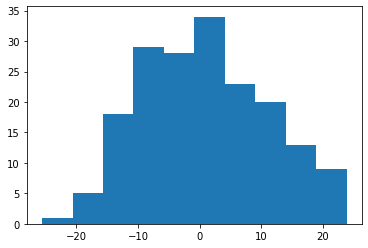

In [4]:
plt.hist(random_fluctuations)

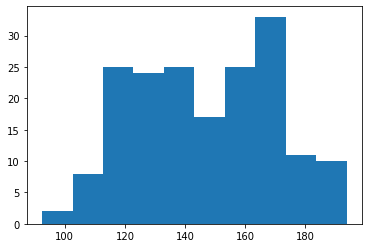

In [5]:
_ = plt.hist(weights)

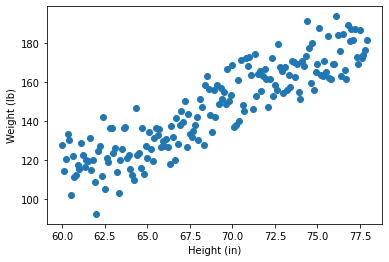

In [6]:
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.show()

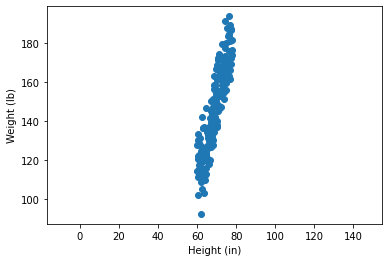

In [7]:
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('Height (in)')
plt.ylabel('Weight (lb)')
plt.axis('equal')
plt.show()

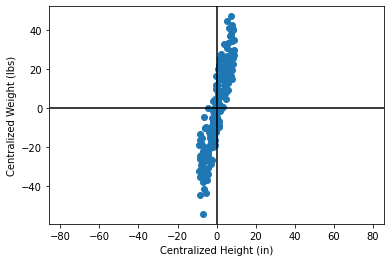

In [8]:
centered_data = np.array([heights - heights.mean(),
                          weights - weights.mean()])
plt.scatter(centered_data[0], centered_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lbs)')
plt.axis('equal')
plt.show()

In [9]:
centered_data.shape

(2, 180)

In [10]:
angle = np.radians(-90)
angle_anti = np.radians(90)

rotation_matrix = np.array([[cos(angle), -sin(angle)],
                            [sin(angle), cos(angle)]])

rotation_matrix_anti = np.array([[cos(angle_anti), -sin(angle_anti)],
                                 [sin(angle_anti), cos(angle_anti)]])

In [11]:
rotation_matrix

array([[ 6.123234e-17,  1.000000e+00],
       [-1.000000e+00,  6.123234e-17]])

In [12]:
rotated_data = rotation_matrix @ centered_data
rotated_data_anti = rotation_matrix_anti @ centered_data

Good resources to review how the rotation matrix works:

https://www.khanacademy.org/math/linear-algebra/matrix-transformations

https://livevideo.manning.com/module/98_1_3/3blue1brown-essence-of-linear-algebra/essence-of-linear-algebra/linear-transformations-and-matrices?

https://setosa.io/ev/sine-and-cosine/#:~:text=Sine%20and%20cosine%20%E2%80%94%20a.k.a.%2C%20sin,adjacent%20side%20to%20the%20hypotenuse%20.

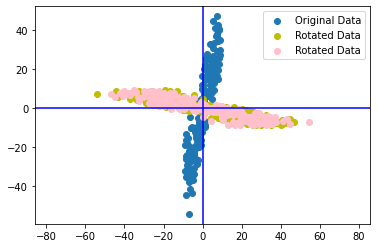

In [13]:
plt.scatter(centered_data[0], centered_data[1], label='Original Data')
plt.scatter(rotated_data[0], rotated_data[1], label='Rotated Data', c = 'y')
plt.scatter(rotated_data_anti[0], rotated_data_anti[1], label='Rotated Data', c = 'pink')

plt.axhline(0, c='b')
plt.axvline(0, c='b')
plt.legend()
plt.axis('equal')
plt.show()

In [14]:
data_labels = ['unrotated', 'rotated']
data_list = [centered_data, rotated_data]
for data_label, data in zip(data_labels, data_list):
    y_values = data[1]
    penalty = y_values @ y_values/y_values.size
    print(f'The penalty score for the {data_label} data is {penalty:.2f}')

The penalty score for the unrotated data is 519.82
The penalty score for the rotated data is 27.00


In [15]:
for data_label, data in zip(data_labels, data_list):
  y_var = data[1].var()
  assert  y_var == data[1]@data[1]/data[1].size
  print(f'The y-axis variance for the {data_label} data is {y_var:.2f}')

The y-axis variance for the unrotated data is 519.82
The y-axis variance for the rotated data is 27.00


X-axis variance

In [16]:
for data_label, data in zip(data_labels, data_list):
  x_var = data[0].var()
  print(f'The x-axis variance for the {data_label} data is {x_var:.2f}')

The x-axis variance for the unrotated data is 27.00
The x-axis variance for the rotated data is 519.82


In [17]:
total_variance = centered_data[0].var() + centered_data[1].var()
assert total_variance == rotated_data[0].var() + rotated_data[1].var()

This entails that:
  * x_values.var() / total_variance == 1 - y_values.var()/total_variance
  * Rotating the data towards the x-axis will lead to an increase in the x-axis variance, and equivalent decrease in y-axis variance.



In [18]:
for data_label, data in zip(data_labels, data_list):
  p_x_var = 100 * data[0].var()/total_variance
  p_y_var = 100 * data[1].var()/total_variance
  print(f'In the {data_label} data, {p_x_var:.2f}% of the total variance is distributed across the x-axis')
  print(f'The remaining {p_y_var:.2f}% of the total variance is distributed across the y-axis\n')

In the unrotated data, 4.94% of the total variance is distributed across the x-axis
The remaining 95.06% of the total variance is distributed across the y-axis

In the rotated data, 95.06% of the total variance is distributed across the x-axis
The remaining 4.94% of the total variance is distributed across the y-axis



Maximizing horizontal dispersion

In [19]:
def rotate(angle, data=centered_data):
  angle = np.radians(-angle)
  rotation_matrix = np.array([[cos(angle), -sin(angle)],
                              [sin(angle), cos(angle)]])
  return rotation_matrix @ data

In [20]:
rotate(angle).shape

(2, 180)

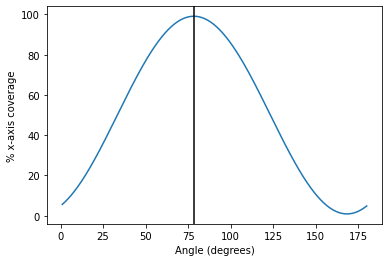

The horizontal variance is maximized to approximately 541 after a 78.30 deg rotation.
The rotation distributes 


In [21]:
angles = np.arange(1, 180, 0.1)
x_variances = [(rotate(angle)[0].var()) for angle in angles]
p_x_var = 100*np.array(x_variances)/total_variance
optimal_index = np.argmax(p_x_var)
optimal_angle = angles[optimal_index]
plt.plot(angles, p_x_var)
plt.axvline(optimal_angle, c='k')
plt.xlabel('Angle (degrees)')
plt.ylabel('% x-axis coverage')
plt.show()

max_coverage = p_x_var[optimal_index]
max_x_var = x_variances[optimal_index]

print('The horizontal variance is maximized to approximately '
       f'{int(max_x_var)} after a {optimal_angle:.2f} deg rotation.')
print(f'The rotation distributes ')

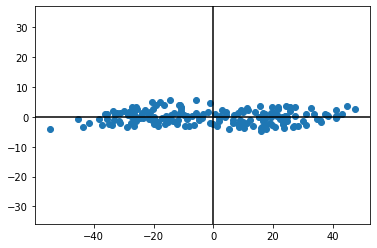

In [22]:
best_rotated_data = rotate(optimal_angle)
plt.scatter(best_rotated_data[0], best_rotated_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

In [25]:
x_values = best_rotated_data[0]
sorted_x_values = sorted(x_values)
cluster_size = int(x_values.size/3)
small_cutoff = max(sorted_x_values[:cluster_size])
larger_cutoff = min(sorted_x_values[-cluster_size:])
print(f"A 1D threshold of {small_cutoff:.2f} seperates the small sized and"
        " medium sized customers")
print(f"A 1D threshold of {larger_cutoff:.2f} seperates the medium sized "
        "and large sized customers")

A 1D threshold of -14.61 seperates the small sized and medium sized customers
A 1D threshold of 15.80 seperates the medium sized and large sized customers


In [52]:
def plot_customer_segments(horizontal_2d_data):
  small, medium, large = [], [], []
  cluster_labels = ['Small', 'Medium', 'Large']
  for x_value, y_value in horizontal_2d_data:
    if x_value <= small_cutoff:
      small.append([x_value, y_value])
    elif small_cutoff < x_value < larger_cutoff:
      medium.append([x_value, y_value])
    else:
      large.append([x_value, y_value])
  
  for i, cluster in enumerate([small, medium, large]):
    cluster_x_values, cluster_y_values = np.array(cluster).T
    plt.scatter(cluster_x_values, cluster_y_values,
                color=['g', 'b', 'y'][i],
                label=cluster_labels[i])
  
  plt.axhline(0, c='black')
  plt.axvline(larger_cutoff, c='black', linewidth=3, 
              linestyle='--')
  plt.axvline(small_cutoff, c='black', linewidth=3,
              linestyle='--')
  plt.axis('equal')
  plt.legend()
  plt.show()

In [37]:
best_rotated_data.shape

(2, 180)

In [38]:
best_rotated_data.T.shape

(180, 2)

In [40]:
best_rotated_data.T[0:10]

array([[-20.51052004,   4.89237696],
       [-33.45412449,   2.10976353],
       [-27.3765617 ,   3.26624448],
       [-14.60528207,   5.80892754],
       [-17.84909775,   5.0350438 ],
       [-45.29441166,  -0.75072928],
       [-26.00923337,   3.14091734],
       [-36.38287233,   0.89051819],
       [-35.49952271,   0.9713293 ],
       [-30.05613813,   1.99647825]])

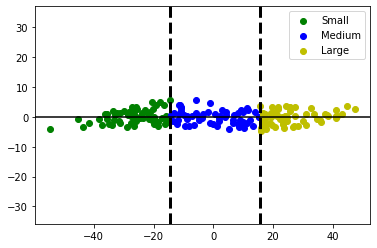

In [53]:
plot_customer_segments(best_rotated_data.T)

In [54]:
zero_y_values = np.zeros(x_values.size)
reproduced_data = rotate(-optimal_angle, data=[x_values, zero_y_values])

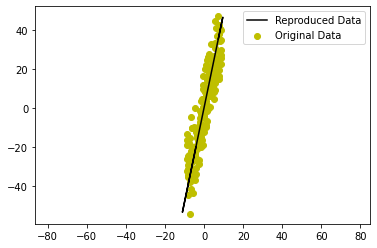

In [55]:
plt.plot(reproduced_data[0], reproduced_data[1], c='k', 
         label='Reproduced Data')
plt.scatter(centered_data[0], centered_data[1], c='y', 
            label='Original Data')
plt.axis('equal')
plt.legend()
plt.show()

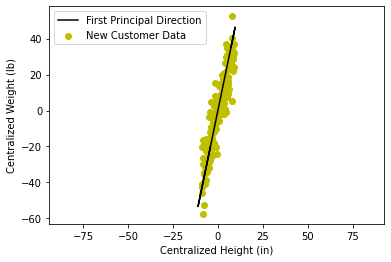

In [56]:
np.random.seed(1)
new_heights = np.arange(60, 78, .11)
random_fluctuations = np.random.normal(scale=10, 
                                       size=new_heights.size)
new_weights = 4*new_heights - 130 + random_fluctuations
new_centered_data = np.array([new_heights - heights.mean(),
                              new_weights - weights.mean()])
plt.scatter(new_centered_data[0], new_centered_data[1], c='y',
            label='New Customer Data')
plt.plot(reproduced_data[0], reproduced_data[1], c='k',
         label='First Principal Direction')
plt.xlabel('Centralized Height (in)')
plt.ylabel('Centralized Weight (lb)')
plt.axis('equal')
plt.legend()
plt.show()

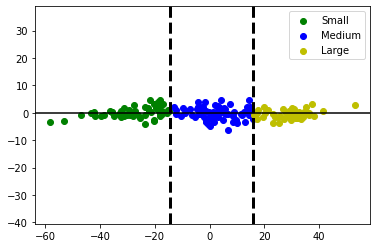

In [58]:
new_horizontal_data = rotate(optimal_angle, data=new_centered_data)
plot_customer_segments(new_horizontal_data.T)